# hidden Markov model

In [65]:
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt 
%matplotlib inline 

In [123]:
B = np.array([[0.9,0.1],[0.2,0.8]])
T = np.array([[0.98,0.02],[0.02,0.98]])
T = np.array([[0.5,0.5],[0.5,0.5]])

R = np.array([[0.8,0],[0,0.2]])
NR = np.array([[0.2,0],[0,0.8]])
choices = ['left','right']

prior = np.array([0.5,0.5])

In [127]:
n_plays = 100
outcomes = []
f = np.zeros((n_plays,2))
prior = np.array([0.5,0.5])

for play in range(n_plays):
    
    #receive outcome, update probs
    
    if play < 50:
        outcomes.append(np.random.uniform() <= 0.8)
    else:
        outcomes.append(np.random.uniform() <= 0.2)
        
        
    if outcomes[-1] is True:
        O = np.array([[0.8,0],[0,0.2]])
    else:
        O = np.array([[0.2,0],[0,0.8]])
    
    
    f_ = np.dot(O*T,prior)
    f[play,:] = f_ / f_.sum()
    prior = f[play] 

(-0.1, 1.1)

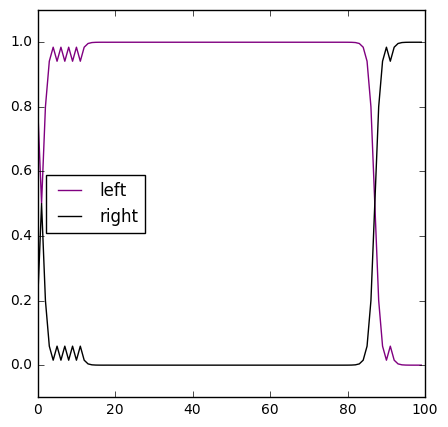

In [128]:
plt.figure(figsize=(5,5))
plt.plot(range(n_plays),f[:,0],color='purple',label='left')
plt.plot(range(n_plays),f[:,1],color='black',label='right')
plt.legend(loc='best')
plt.ylim(-0.1,1.1)

In [114]:
outcomes

[True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [102]:
n_plays = 1
actions = []

for play in range(n_plays):
    
    if play == 0: #choose first one randomly
        actions.append(outcomes[np.random.choice([0,1])])
        
    else:
        
        if np.where(f == f.max())[0][0] == 0:
            actions.append('left')
        else:
            actions.append('right')
    
    #receive outcome, update probs
    outcomes.append(get_outcome(actions[-1]))
    
    f = updateprob(outcomes[-1])    

In [130]:
np.random.uniform()

0.012296604174539705

In [120]:
choices

['left', 'right']

In [76]:
O1 = np.array([[0.9,0],[0,0.2]])

f_1 = O1*T*prior

In [52]:
O1 = np.array([[0.9,0],[0,0.2]])

f_1 = normalize(O1*T*prior,axis=0,norm='l1')

In [71]:
np.linalg.norm(f_1,axis=None)

0.45175767840735148

In [105]:
f = f_1 / f_1.sum()

In [112]:
np.where(f == f.max())[0][0]

0

In [115]:
f

array([[ 0.81818182,  0.        ],
       [ 0.        ,  0.18181818]])